In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
car_ds = '../data_sets/car_ds.csv'
car_data = pd.read_csv(car_ds)

In [145]:
car_data.shape

(4340, 8)

In [146]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [147]:
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [148]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [149]:
car_data.value_counts("seller_type")

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [150]:
car_data.value_counts("owner")

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [151]:
car_data.value_counts("fuel")

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [152]:
car_data.value_counts("transmission")

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [153]:
car_data.replace(
    {
        "fuel": {
            "Diesel":1,      
            "Petrol": 0,      
            "CNG": 2,         
            "LPG": 3,         
            "Electric": 4,    
        },
        "seller_type":{
            "Individual":1,      
            "Dealer":0,          
            "Trustmark Dealer":2,
        },
        "transmission":{
            "Manual":0,
            "Automatic":1
        },
        "owner":{
            "First Owner":0,
            "Second Owner":1,
            "Third Owner":2,
            "Fourth & Above Owner":3,
            "Test Drive Car":4
        }
    },
    inplace=True
)

C:\Users\rajun\AppData\Local\Temp\ipykernel_4532\178622354.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace(


In [154]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [155]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int64 
 5   seller_type    4340 non-null   int64 
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


In [156]:
X = car_data.drop(columns=["name", "selling_price"], axis=1)

Y = car_data["selling_price"]

In [157]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,1,0,0
1,2007,50000,0,1,0,0
2,2012,100000,1,1,0,0
3,2017,46000,0,1,0,0
4,2014,141000,1,1,0,1


In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    train_size=0.8,
    random_state=2,
)

Linear Regression


In [159]:
model = LinearRegression()


In [160]:
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [161]:
X_train_prediction = model.predict(X_train)

In [162]:
error_score = metrics.r2_score(Y_train, X_train_prediction)

error_score

0.423331057072869

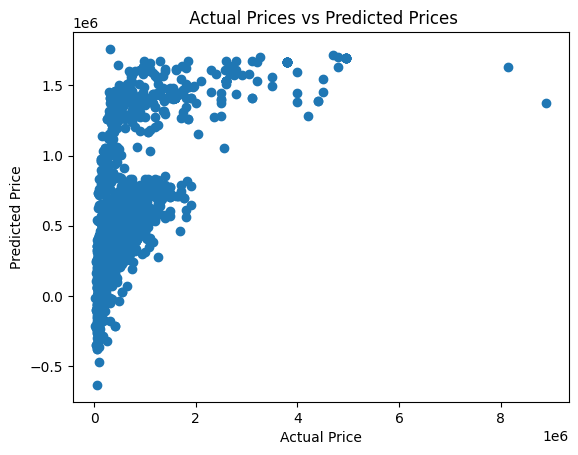

In [165]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [167]:
X_test_prediction = model.predict(X_test)

In [168]:
error_score = metrics.r2_score(Y_test, X_test_prediction)

error_score

0.48476328076537933

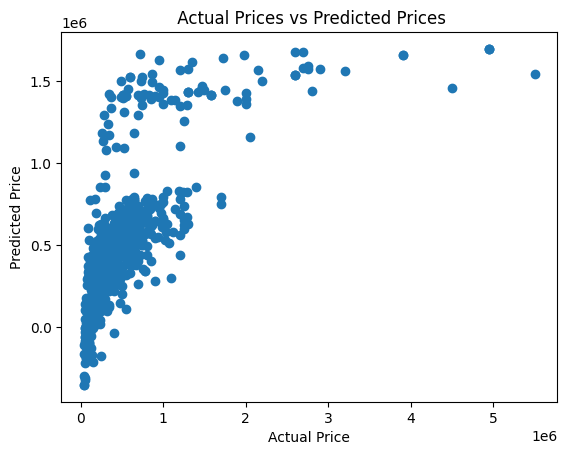

In [170]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Lasso Regression


In [171]:
model = Lasso()

In [172]:
model.fit(X_train, Y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [173]:
X_train_prediction = model.predict(X_train)

In [174]:
error_score = metrics.r2_score(Y_train, X_train_prediction)

In [175]:
error_score

0.4233310570179156

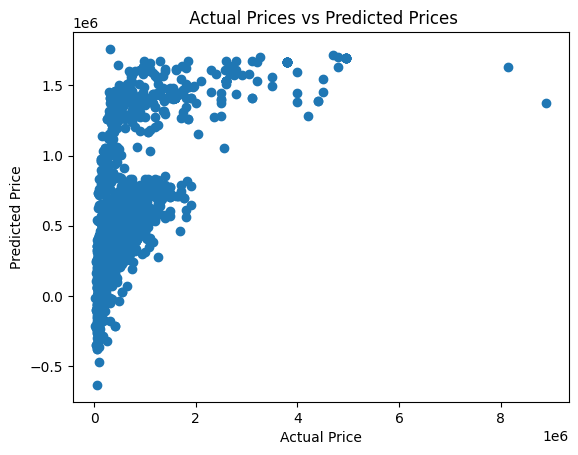

In [176]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [177]:
X_test_prediction = model.predict(X_test)

In [178]:
error_score = metrics.r2_score(Y_test, X_test_prediction)

error_score

0.48476306480201936

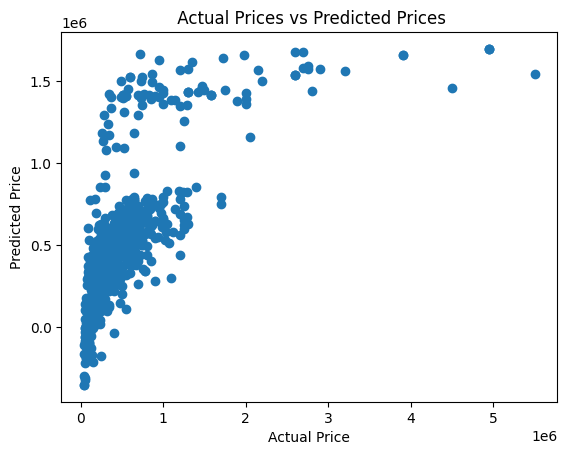

In [179]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()